# AML-3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [ ]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [ ]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

#Normalizing the data
x_training = x_training/255
x_testing = x_testing/255

In [ ]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


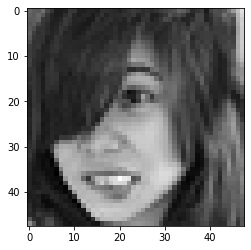

facial emotion: fear


In [ ]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,28708)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [ ]:
# Creating lists to add happy and sad image instances
x_training_binaryl = []
y_training_binaryl = []
x_testing_binaryl = []
y_testing_binaryl = []

# Checking and Adding desired images to the previosly created lists.
for index in range(0, len(x_training)):
  if get_emotion(y_training[index, :]) == 'happy':
    x_training_binaryl.append(x_training[index])
    y_training_binaryl.append(1)
  elif get_emotion(y_training[index, :]) == 'sad':
    x_training_binaryl.append(x_training[index])
    y_training_binaryl.append(0)
for index in range(0, len(x_testing)):
  if get_emotion(y_testing[index, :]) == 'happy':
    x_testing_binaryl.append(x_testing[index])
    y_testing_binaryl.append(1)
  elif get_emotion(y_testing[index, :]) == 'sad':
    x_testing_binaryl.append(x_testing[index])
    y_testing_binaryl.append(0)
  
# Converting the lists into numpy arrays.
### NORMAL TRAINING SETS
x_training_binary = np.array(x_training_binaryl)
x_testing_binary = np.array(x_testing_binaryl)
y_training_binary = np.array(y_training_binaryl)
y_testing_binary = np.array(y_testing_binaryl)
print(x_training_binary.shape)
print(y_training_binary.shape)
print(x_testing_binary.shape)
print(y_testing_binary.shape)

(12045, 48, 48)
(12045,)
(1548, 48, 48)
(1548,)


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [ ]:
n_components = 150
pca = PCA(n_components = n_components, svd_solver = 'randomized',).fit(x_training_binary.reshape(x_training_binary.shape[0],-1))
#Components created with PCA (150)
eigenfaces = pca.components_.reshape((n_components, 48, 48))
### Training Sets with PCA
x_training_binary_pca = pca.transform(x_training_binary.reshape(x_training_binary.shape[0],-1))
x_testing_binary_pca = pca.transform(x_testing_binary.reshape(x_testing_binary.shape[0],-1))

In [ ]:
print("Sample Data point after applying PCA\n", x_training_binary_pca[0])
print("-----------------------------------------------------")
print("Dimensions of training set = % s and Test Set = % s"%(
        x_training_binary.shape, x_testing_binary.shape))

Sample Data point after applying PCA
 [-1.27371514e+00 -3.35513802e+00  5.04033434e+00 -6.06027336e+00
  2.18936193e+00  1.19354035e+00 -3.74269253e+00 -2.46947718e+00
 -7.46635637e-01 -1.35566299e+00 -3.69235856e-04  3.19208899e-01
  7.27767515e-01 -9.65572467e-01 -6.81884753e-01 -1.18671326e+00
  9.83141659e-01  1.62802212e-01 -1.12630936e+00  4.91510949e-01
  6.51121520e-01  2.74335446e-01 -1.27778482e+00  6.99279073e-01
  3.17499509e-01  1.62517291e-01 -1.02262888e+00 -6.47877766e-01
 -1.40519473e-01 -1.31181554e+00  1.28740342e-02 -1.88457699e-02
  4.74197502e-01  6.99662208e-01 -7.55216334e-01  1.00829293e+00
  8.14827217e-01  4.03066379e-02  4.02241665e-01  2.97872904e-01
  9.51050277e-01  1.69176538e-01  7.73450655e-01 -8.48113789e-01
 -6.22688789e-01  2.52903501e-01 -8.84581661e-02 -4.95248961e-01
 -2.83283404e-01 -8.78445155e-02 -2.99837227e-01 -7.95997339e-01
 -3.21447088e-01  1.04484990e+00 -9.19123588e-01 -5.63011308e-01
  2.93294206e-01  6.41431938e-02 -7.52405161e-02 -6.

After creating 150 eigenfaces, lets look at the first 15 to showcase the results of the PCA

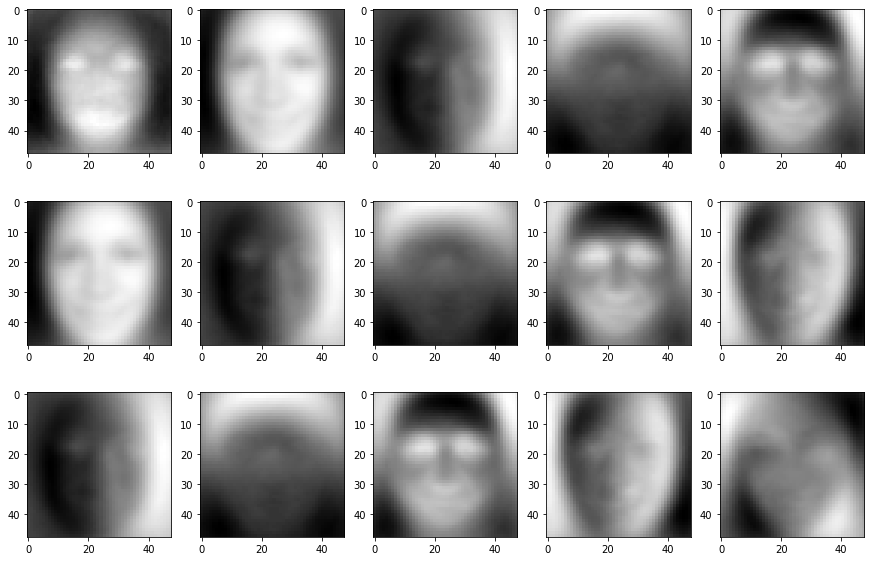

In [ ]:
fig, axs = plt.subplots(3,5,figsize=(15, 10))
for i in range(0,3):
  for j in range(0,5):
    axs[i,j].imshow(eigenfaces[i+j], cmap='gray')

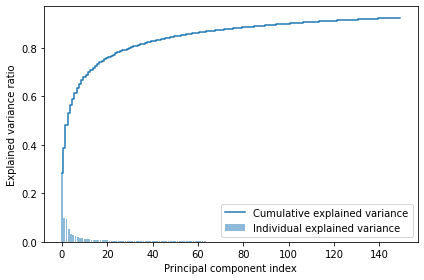

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

This graph shows the variance ratio added by each step of principal component added. 150 principal components may be too much for the little gain, but we will keep it that way for simplicity.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
###Training sets with LDA
x_training_binary_lda = lda.fit_transform(x_training_binary.reshape(x_training_binary.shape[0],-1), y_training_binary)
x_testing_binary_lda = lda.transform(x_testing_binary.reshape(x_testing_binary.shape[0],-1))

x_training_binary_lda

array([[ 1.2292416 ],
       [-0.44829106],
       [-0.65741687],
       ...,
       [-2.35162194],
       [-0.77807789],
       [-0.52660385]])

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_normal_model = GaussianNB()
gnb_normal_model.fit(x_training_binary.reshape(x_training_binary.shape[0],-1), y_training_binary)
gnb_normal_model_pred = gnb_normal_model.predict(x_testing_binary.reshape(x_testing_binary.shape[0],-1))

gnb_pca_model = GaussianNB()
gnb_pca_model.fit(x_training_binary_pca, y_training_binary)
gnb_pca_model_pred = gnb_pca_model.predict(x_testing_binary_pca)

gnb_lda_model = GaussianNB()
gnb_lda_model.fit(x_training_binary_lda, y_training_binary)
gnb_lda_model_pred = gnb_lda_model.predict(x_testing_binary_lda)


In [ ]:
from sklearn import metrics
print("Naive Bayes Accuracy with Normal Data:",metrics.accuracy_score(y_testing_binary, gnb_normal_model_pred))
print("Naive Bayes Accuracy with PCA Data:",metrics.accuracy_score(y_testing_binary, gnb_pca_model_pred))
print("Naive Bayes Accuracy with LDA Data:",metrics.accuracy_score(y_testing_binary, gnb_lda_model_pred))

Naive Bayes Accuracy with Normal Data: 0.5904392764857881
Naive Bayes Accuracy with PCA Data: 0.6027131782945736
Naive Bayes Accuracy with LDA Data: 0.6750645994832042


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_normal_model = LogisticRegression()
lr_normal_model.fit(x_training_binary.reshape(x_training_binary.shape[0],-1), y_training_binary)
lr_normal_model_pred = lr_normal_model.predict(x_testing_binary.reshape(x_testing_binary.shape[0],-1))

lr_pca_model = LogisticRegression()
lr_pca_model.fit(x_training_binary_pca, y_training_binary)
lr_pca_model_pred = lr_pca_model.predict(x_testing_binary_pca)

lr_lda_model = LogisticRegression()
lr_lda_model.fit(x_training_binary_lda, y_training_binary)
lr_lda_model_pred = lr_lda_model.predict(x_testing_binary_lda)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Logistic Regression Accuracy with Normal Data:",metrics.accuracy_score(y_testing_binary, lr_normal_model_pred))
print("Logistic Regression Accuracy with PCA Data:",metrics.accuracy_score(y_testing_binary, lr_pca_model_pred))
print("Logistic Regression Accuracy with LDA Data:",metrics.accuracy_score(y_testing_binary, lr_lda_model_pred))

Logistic Regression Accuracy with Normal Data: 0.7164082687338501
Logistic Regression Accuracy with PCA Data: 0.7241602067183462
Logistic Regression Accuracy with LDA Data: 0.6731266149870802


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [ ]:
from sklearn.svm import SVC

svc_normal_model = SVC(kernel='poly',degree=3, gamma=0.004147722987833689, C=6.7046885962229785)
svc_normal_model.fit(x_training_binary.reshape(x_training_binary.shape[0],-1), y_training_binary)
svc_normal_model_pred = svc_normal_model.predict(x_testing_binary.reshape(x_testing_binary.shape[0],-1))

svc_pca_model = SVC(kernel='poly',degree=3, gamma=0.004147722987833689, C=6.7046885962229785)
svc_pca_model.fit(x_training_binary_pca, y_training_binary)
svc_pca_model_pred = svc_pca_model.predict(x_testing_binary_pca)

svc_lda_model = SVC(kernel='poly',degree=3, gamma=0.004147722987833689, C=6.7046885962229785)
svc_lda_model.fit(x_training_binary_lda, y_training_binary)
svc_lda_model_pred = svc_lda_model.predict(x_testing_binary_lda)


In [ ]:
print("Support Vector Machine Accuracy with Normal Data:",metrics.accuracy_score(y_testing_binary, svc_normal_model_pred))
print("Support Vector Machine Accuracy with PCA Data:",metrics.accuracy_score(y_testing_binary, svc_pca_model_pred))
print("Support Vector Machine Accuracy with LDA Data:",metrics.accuracy_score(y_testing_binary, svc_lda_model_pred))

Support Vector Machine Accuracy with Normal Data: 0.7312661498708011
Support Vector Machine Accuracy with PCA Data: 0.6724806201550387
Support Vector Machine Accuracy with LDA Data: 0.5794573643410853


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

Taking into account that this is a BINARY classification problem, logistic regression seems like the better approach to determine degrees at which each instance is closer to one side to the other. As per the nature of logistic regression which clearly separates the classification into 1 and 0 with a threshold, this can give us a percentage of closeness or degree of happines of each of the faces.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [ ]:
sad_faces = lr_pca_model.predict_proba(x_testing_binary_pca)[:,0] #Making an array with the probability of each face to be sad
sad_faces_indxs = sad_faces.argsort()[-5:][::-1]#Sorting previously created array with their indexes and chosing the 5 highest
print(sad_faces_indxs)

happy_faces = lr_pca_model.predict_proba(x_testing_binary_pca)[:,1]#Making an array with the probability of each face to be Happy
happy_faces_indxs = happy_faces.argsort()[-5:][::-1]#Sorting previously created array with their indexes and chosing the 5 highest
print(happy_faces_indxs)

[ 135 1289 1121  910  227]
[1491 1506 1269  608  474]


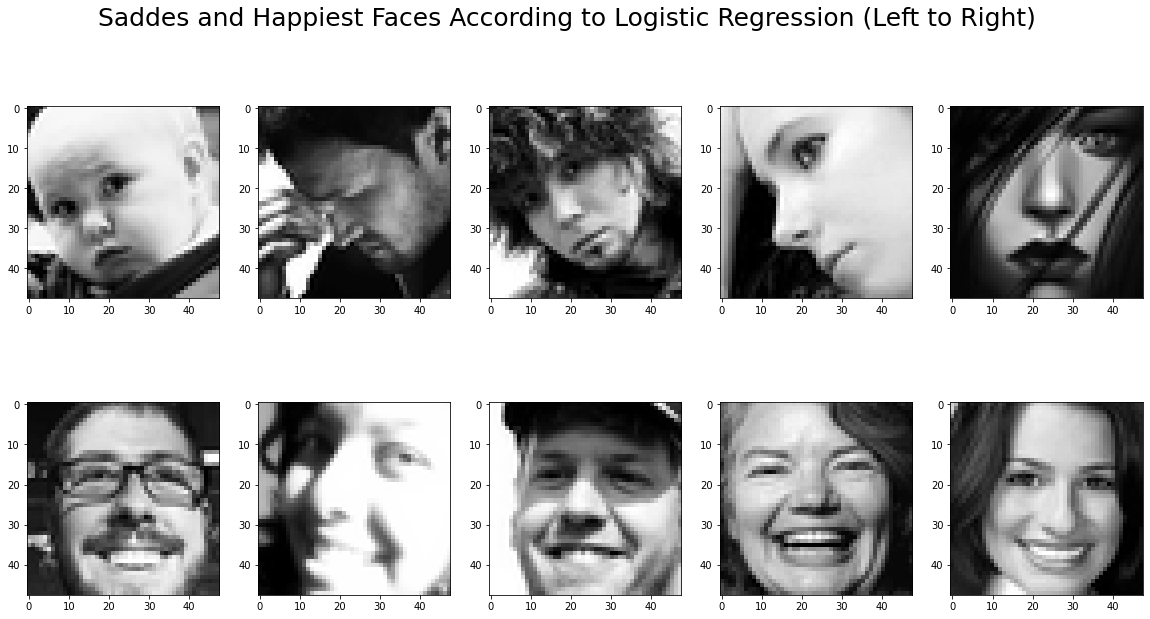

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(20, 10))
fig.suptitle('Saddest and Happiest Faces According to Logistic Regression (Left to Right)', size=25)
for i in range(0,2):
  for j in range(0,5):
    if i == 0:
      axs[i,j].imshow(x_testing_binary[sad_faces_indxs[j]], cmap='gray')
    if i == 1:
      axs[i,j].imshow(x_testing_binary[happy_faces_indxs[j]], cmap='gray')

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [ ]:
pca_multiclass = PCA(n_components = n_components, svd_solver = 'randomized',).fit(x_training.reshape(x_training.shape[0],-1))

eigenfaces_multiclass = pca_multiclass.components_.reshape((n_components, 48, 48))
### Training Sets with PCA
x_training_pca = pca_multiclass.transform(x_training.reshape(x_training.shape[0],-1))
x_testing_pca = pca_multiclass.transform(x_testing.reshape(x_testing.shape[0],-1))

In [ ]:
print("Dimensions of training set = % s and Test Set = % s"%(
        x_training.shape, x_testing.shape))

Dimensions of training set = (28709, 48, 48) and Test Set = (3589, 48, 48)


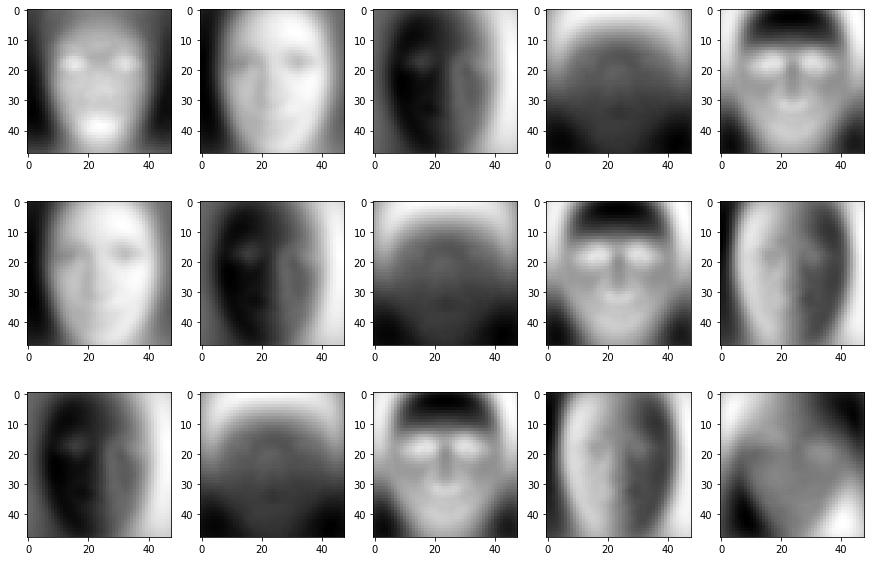

In [ ]:
fig, axs = plt.subplots(3,5,figsize=(15, 10))
for i in range(0,3):
  for j in range(0,5):
    axs[i,j].imshow(eigenfaces_multiclass[i+j], cmap='gray')

The full dataset seems to create almost identical eigenfaces than the happy/sad subdataset. This may be because the size of the subdataset if half of the complete one, and due to the high number of eigenfaces generated (150). It is possible that is a lower amount of principal components would have been chosen the difference would be more noticeable.

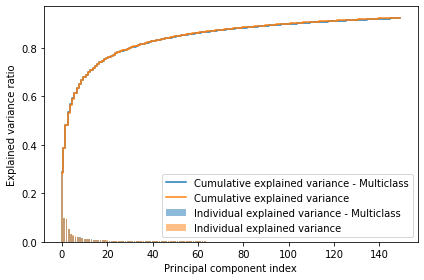

In [ ]:
exp_var_pca_multiclass = pca_multiclass.explained_variance_ratio_
cum_sum_eigenvalues_multiclass = np.cumsum(exp_var_pca_multiclass)

plt.bar(range(0,len(exp_var_pca_multiclass)), exp_var_pca_multiclass, alpha=0.5, align='center', label='Individual explained variance - Multiclass')
plt.step(range(0,len(cum_sum_eigenvalues_multiclass)), cum_sum_eigenvalues_multiclass, where='mid',label='Cumulative explained variance - Multiclass')
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Again, due to the creation of almost identical principal components, there is barely any difference in the cummulative variance with component steps.

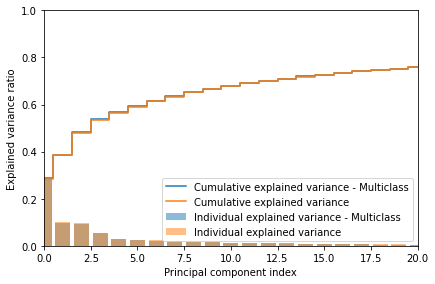

In [ ]:
plt.bar(range(0,len(exp_var_pca_multiclass)), exp_var_pca_multiclass, alpha=0.5, align='center', label='Individual explained variance - Multiclass')
plt.step(range(0,len(cum_sum_eigenvalues_multiclass)), cum_sum_eigenvalues_multiclass, where='mid',label='Cumulative explained variance - Multiclass')
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.axis([0, 20, 0, 1])
plt.show()

In [ ]:
y_training_converted = []
y_testing_converted = []

for y in y_training:
  y_training_converted.append(np.argmax(y))
for y in y_testing:
  y_testing_converted.append(np.argmax(y))

y_training = np.array(y_training_converted)
y_testing = np.array(y_testing_converted)
y_training.shape, y_testing.shape

((28709,), (3589,))

In [ ]:
lda_multiclass = LDA(n_components = 6)

###Training sets with LDA
x_training_lda = lda_multiclass.fit_transform(x_training.reshape(x_training.shape[0],-1), y_training)
x_testing_lda = lda_multiclass.transform(x_testing.reshape(x_testing.shape[0],-1))

x_training_lda

array([[-0.89790061,  0.73966435,  0.11164885,  0.55355685,  0.00995553,
         0.51443565],
       [ 0.48954574,  1.71634766,  1.3334097 ,  2.0135963 ,  0.91454015,
        -0.56203883],
       [ 0.68148867, -1.57105183, -0.39498147,  0.69175724, -1.13777497,
         1.30925276],
       ...,
       [ 0.37270918,  1.09405938, -0.4892574 , -0.46138412, -0.83744098,
        -0.49694395],
       [ 1.11375301, -0.87471452, -2.34601014,  0.22521744, -0.75057007,
         0.55596646],
       [ 0.8943968 ,  0.1093783 ,  0.41176276,  0.45729408,  0.59795439,
         0.12018461]])

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [ ]:
gnb_normal_model_multiclass = GaussianNB()
gnb_normal_model_multiclass.fit(x_training.reshape(x_training.shape[0],-1), y_training)
gnb_normal_model_multiclass_pred = gnb_normal_model_multiclass.predict(x_testing.reshape(x_testing.shape[0],-1))

gnb_pca_model_multiclass = GaussianNB()
gnb_pca_model_multiclass.fit(x_training_pca, y_training)
gnb_pca_model_multiclass_pred = gnb_pca_model_multiclass.predict(x_testing_pca)

gnb_lda_model_multiclass = GaussianNB()
gnb_lda_model_multiclass.fit(x_training_lda, y_training)
gnb_lda_model_multiclass_pred = gnb_lda_model_multiclass.predict(x_testing_lda)

print("Naive Bayes Accuracy with Normal Data:",metrics.accuracy_score(y_testing, gnb_normal_model_multiclass_pred))
print("Naive Bayes Accuracy with PCA Data:",metrics.accuracy_score(y_testing, gnb_pca_model_multiclass_pred))
print("Naive Bayes Accuracy with LDA Data:",metrics.accuracy_score(y_testing, gnb_lda_model_multiclass_pred))

Naive Bayes Accuracy with Normal Data: 0.22736138200055725
Naive Bayes Accuracy with PCA Data: 0.30760657564781274
Naive Bayes Accuracy with LDA Data: 0.3516299804959599


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

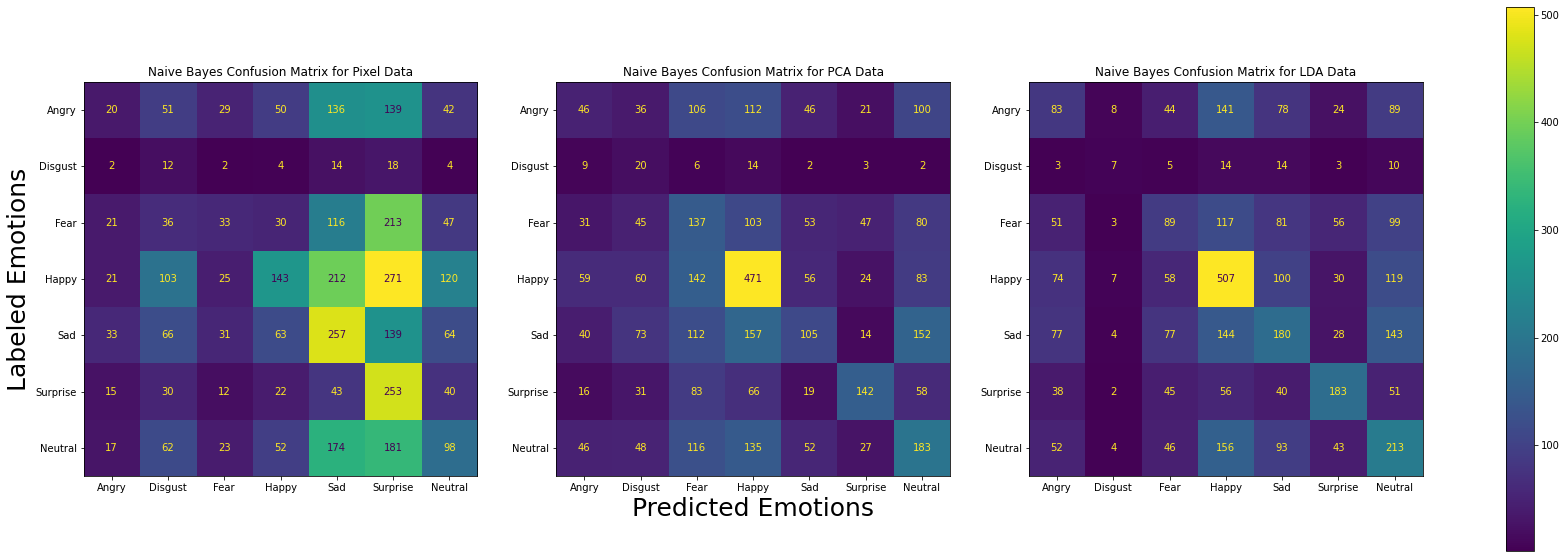

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

nb_normal_cf = confusion_matrix(y_testing, gnb_normal_model_multiclass_pred)
nb_pca_cf = confusion_matrix(y_testing, gnb_pca_model_multiclass_pred)
nb_lda_cf = confusion_matrix(y_testing, gnb_lda_model_multiclass_pred)


f, axes = plt.subplots(1, 3, figsize=(30, 10))
axes = axes.ravel()
disp = ConfusionMatrixDisplay(nb_normal_cf , display_labels=cf_categories)
disp.plot(ax=axes[0], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'Naive Bayes Confusion Matrix for Pixel Data')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('Labeled Emotions', size = 25)
disp.im_.colorbar.remove()

disp = ConfusionMatrixDisplay(nb_pca_cf , display_labels=cf_categories)
disp.plot(ax=axes[1], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'Naive Bayes Confusion Matrix for PCA Data')
disp.ax_.set_xlabel('Predicted Emotions', size = 25)
disp.ax_.set_ylabel('')
disp.im_.colorbar.remove()

disp = ConfusionMatrixDisplay(nb_lda_cf , display_labels=cf_categories)
disp.plot(ax=axes[2], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'Naive Bayes Confusion Matrix for LDA Data')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')
disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.2, hspace=0.5)
f.colorbar(disp.im_, ax=axes)
plt.show()


[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [ ]:
lr_normal_model_multiclass = LogisticRegression()
lr_normal_model_multiclass.fit(x_training.reshape(x_training.shape[0],-1), y_training)
lr_normal_model_multiclass_pred = lr_normal_model_multiclass.predict(x_testing.reshape(x_testing.shape[0],-1))

lr_pca_model_multiclass = LogisticRegression()
lr_pca_model_multiclass.fit(x_training_pca, y_training)
lr_pca_model__multiclass_pred = lr_pca_model_multiclass.predict(x_testing_pca)

lr_lda_model_multiclass = LogisticRegression()
lr_lda_model_multiclass.fit(x_training_lda, y_training)
lr_lda_model_multiclass_pred = lr_lda_model_multiclass.predict(x_testing_lda)

print("Logistic Regression Accuracy with Normal Data:",metrics.accuracy_score(y_testing, lr_normal_model_multiclass_pred))
print("Logistic Regression Accuracy with PCA Data:",metrics.accuracy_score(y_testing, lr_pca_model__multiclass_pred))
print("Logistic Regression Accuracy with LDA Data:",metrics.accuracy_score(y_testing, lr_lda_model_multiclass_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression Accuracy with Normal Data: 0.37614934522151017
Logistic Regression Accuracy with PCA Data: 0.38562273613820003
Logistic Regression Accuracy with LDA Data: 0.34633602674839786


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

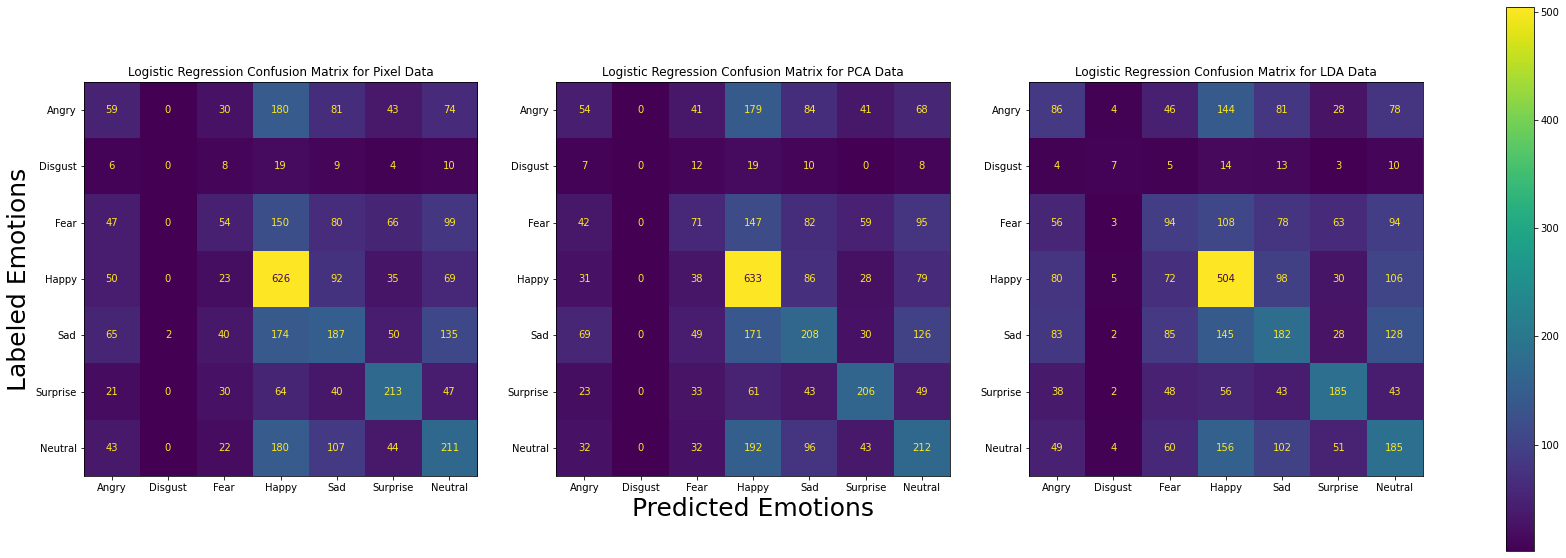

In [ ]:
lr_normal_cf = confusion_matrix(y_testing, lr_normal_model_multiclass_pred)
lr_pca_cf = confusion_matrix(y_testing, lr_pca_model__multiclass_pred)
lr_lda_cf = confusion_matrix(y_testing, lr_lda_model_multiclass_pred)


f, axes = plt.subplots(1, 3, figsize=(30, 10))
axes = axes.ravel()
disp = ConfusionMatrixDisplay(lr_normal_cf , display_labels=cf_categories)
disp.plot(ax=axes[0], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'Logistic Regression Confusion Matrix for Pixel Data')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('Labeled Emotions', size = 25)
disp.im_.colorbar.remove()

disp = ConfusionMatrixDisplay(lr_pca_cf , display_labels=cf_categories)
disp.plot(ax=axes[1], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'Logistic Regression Confusion Matrix for PCA Data')
disp.ax_.set_xlabel('Predicted Emotions', size = 25)
disp.ax_.set_ylabel('')
disp.im_.colorbar.remove()

disp = ConfusionMatrixDisplay(lr_lda_cf , display_labels=cf_categories)
disp.plot(ax=axes[2], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'Logistic Regression Confusion Matrix for LDA Data')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')
disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.2, hspace=0.5)
f.colorbar(disp.im_, ax=axes)
plt.show()

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [ ]:
svc_normal_model_multiclass = SVC(kernel='poly',degree=7, gamma=0.004147722987833689, C=6.7046885962229785)
svc_normal_model_multiclass.fit(x_training.reshape(x_training.shape[0],-1), y_training)
svc_normal_model_multiclass_pred = svc_normal_model_multiclass.predict(x_testing.reshape(x_testing.shape[0],-1))

svc_pca_model_multiclass = SVC(kernel='poly',degree=7, gamma=0.004147722987833689, C=6.7046885962229785)
svc_pca_model_multiclass.fit(x_training_pca, y_training)
svc_pca_model_multiclass_pred = svc_pca_model_multiclass.predict(x_testing_pca)

svc_lda_model_multiclass = SVC(kernel='poly',degree=7, gamma=0.004147722987833689, C=6.7046885962229785)
svc_lda_model_multiclass.fit(x_training_lda, y_training)
svc_lda_model_multiclass_pred = svc_lda_model_multiclass.predict(x_testing_lda)

print("SVM Accuracy with Normal Data:",metrics.accuracy_score(y_testing, svc_normal_model_multiclass_pred))
print("SVM Accuracy with PCA Data:",metrics.accuracy_score(y_testing, svc_pca_model_multiclass_pred))
print("SMV Accuracy with LDA Data:",metrics.accuracy_score(y_testing, svc_lda_model_multiclass_pred))

SVM Accuracy with Normal Data: 0.3911953190303706
SVM Accuracy with PCA Data: 0.29785455558651436
SMV Accuracy with LDA Data: 0.24937308442463083


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

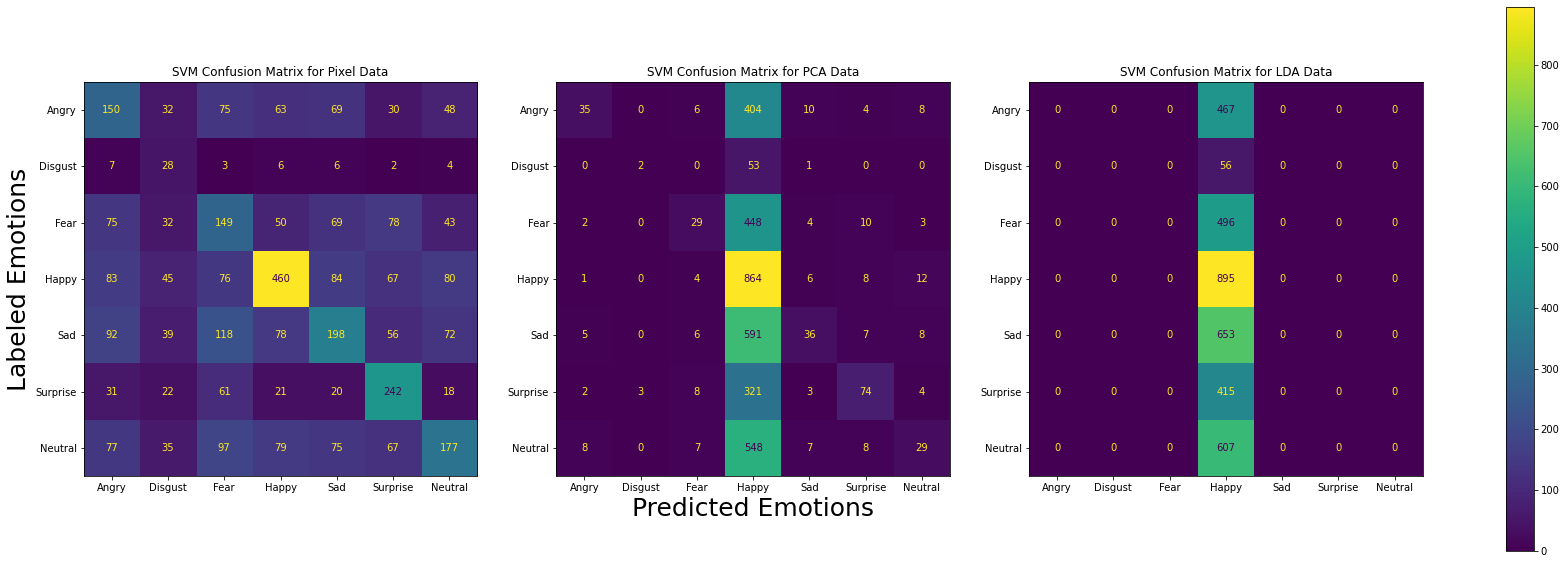

In [ ]:
svm_normal_cf = confusion_matrix(y_testing, svc_normal_model_multiclass_pred)
svm_pca_cf = confusion_matrix(y_testing, svc_pca_model_multiclass_pred)
svm_lda_cf = confusion_matrix(y_testing, svc_lda_model_multiclass_pred)


f, axes = plt.subplots(1, 3, figsize=(30, 10))
axes = axes.ravel()
disp = ConfusionMatrixDisplay(svm_normal_cf , display_labels=cf_categories)
disp.plot(ax=axes[0], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'SVM Confusion Matrix for Pixel Data')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('Labeled Emotions', size = 25)
disp.im_.colorbar.remove()

disp = ConfusionMatrixDisplay(svm_pca_cf , display_labels=cf_categories)
disp.plot(ax=axes[1], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'SVM Confusion Matrix for PCA Data')
disp.ax_.set_xlabel('Predicted Emotions', size = 25)
disp.ax_.set_ylabel('')
disp.im_.colorbar.remove()

disp = ConfusionMatrixDisplay(svm_lda_cf , display_labels=cf_categories)
disp.plot(ax=axes[2], values_format='.4g')
disp.ax_.grid(False)
disp.ax_.set_title(f'SVM Confusion Matrix for LDA Data')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')
disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.2, hspace=0.5)
f.colorbar(disp.im_, ax=axes)
plt.show()

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [ ]:
# YOUR CODE HERE

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:
# YOUR CODE HERE